### IDs:
Insert yours IDs to the cell below

ID #1: 204079453

ID #2: 205714447


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [109]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [110]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

In [111]:
print(df.shape)
display(df.head())

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [112]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


1. describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

In [114]:
print(f"The boston datset has {df.shape[0]} samples, with {df.shape[1]} features (including the target feature) \nand all the variable are float type")


The boston datset has 506 samples, with 14 features (including the target feature) 
and all the variable are float type


2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.


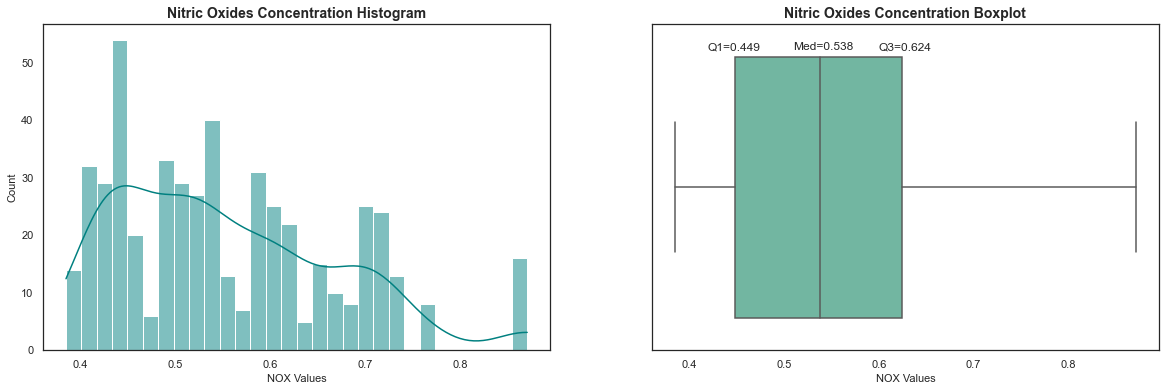

In [115]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.histplot(df['NOX'],ax = ax[0],color = "teal",ec="white",bins=30,kde=True)
ax[0].set_title('Nitric Oxides Concentration Histogram', fontsize = 14, fontweight='bold')
ax[0].set_xlabel("NOX Values",fontsize = 11)
ax[0].set_ylabel("Count",fontsize = 11)
sns.boxplot(x=df['NOX'],ax = ax[1], palette="Set2")
ax[1].set_title('Nitric Oxides Concentration Boxplot', fontsize = 14, fontweight='bold')
ax[1].set_xlabel("NOX Values",fontsize = 11)
ax[1].text(x=0.51,y=-0.42,s="Med="+str(df['NOX'].median()))
ax[1].text(x=0.42,y=-0.42,s="Q1="+str(df['NOX'].quantile(0.25)))
ax[1].text(x=0.6,y=-0.42,s="Q3="+str(df['NOX'].quantile(0.75)))
plt.show()

In [116]:
## Read again.

From the analysis of both plots we can infer the following: 
<ul>
    <li>50% of the values are in between 0.45 to 0.62</li>
    <li>From the wide spread in kde, high variance can be seen (there is no peak)</li>
    <li>It contains right tail</li>
</ul>

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?


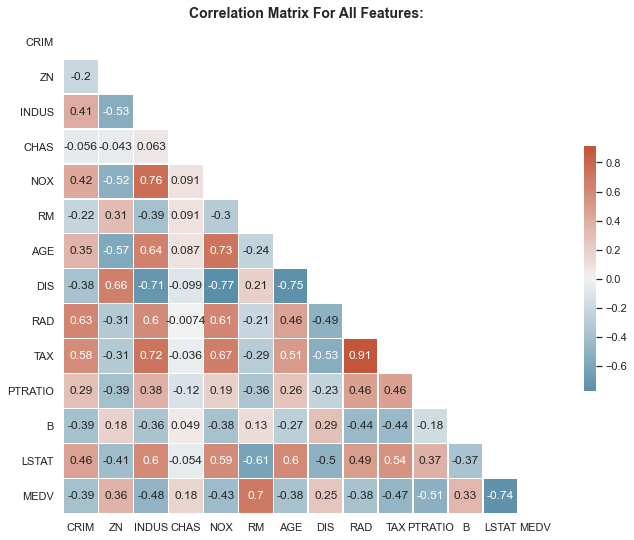

In [117]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask,cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation Matrix For All Features: ",fontsize = 14, fontweight='bold')
plt.show()

   :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

**We assume that correlated features considered from ± 0.6 therfore in our data there are correlated features, as following:*

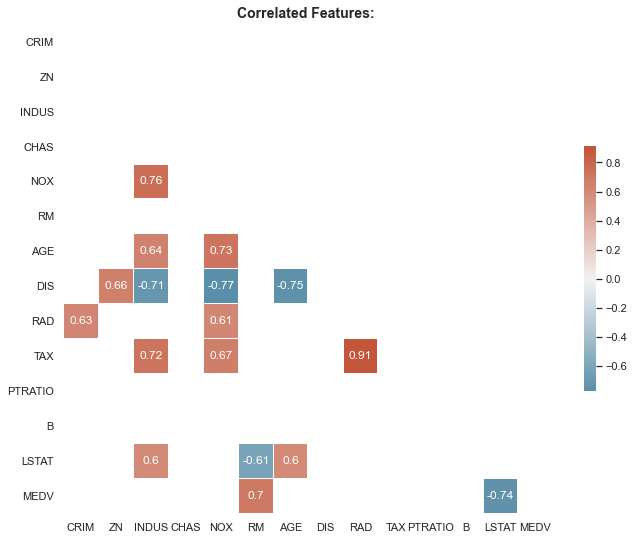

In [118]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[(corr>0.6)|(corr<-0.6)], annot=True,mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlated Features: ",fontsize = 14, fontweight='bold')
plt.show()

From all features, RAD and TAX have the highest correlation.

In [119]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

From the data exploration process we noticed that the CHAS feature is a binary. 
<br>It can be seen that it has a low(~0) correlation with all the other features, since it is a binary variable unlike the other features which are continuous.

4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

In [120]:
temp = corr[corr<1]

In [121]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(corr_matrix, n=5):
    au_corr = corr_matrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [128]:
get_redundant_pairs(temp)
top_corr = get_top_abs_correlations(temp,n=2).reset_index().rename(columns={'level_0':'col1','level_1':'col2','0':''})

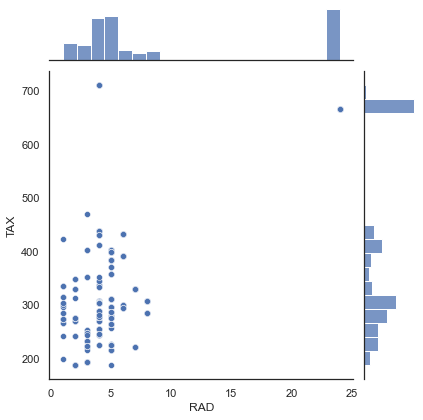

In [147]:
sns.jointplot(x=top_corr['col1'][0], y=top_corr['col2'][0], data=df,marginal_kws=dict(bins=20))
plt.show()

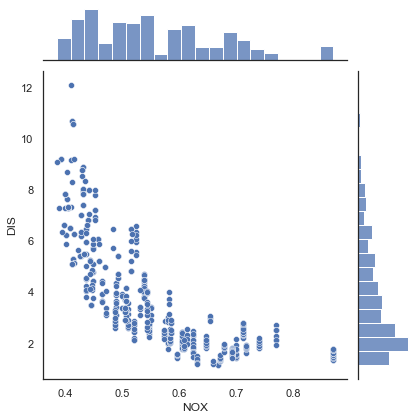

In [149]:
sns.jointplot(x=top_corr['col1'][1], y=top_corr['col2'][1], data=df, marginal_kws=dict(bins=20))
plt.show()

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)


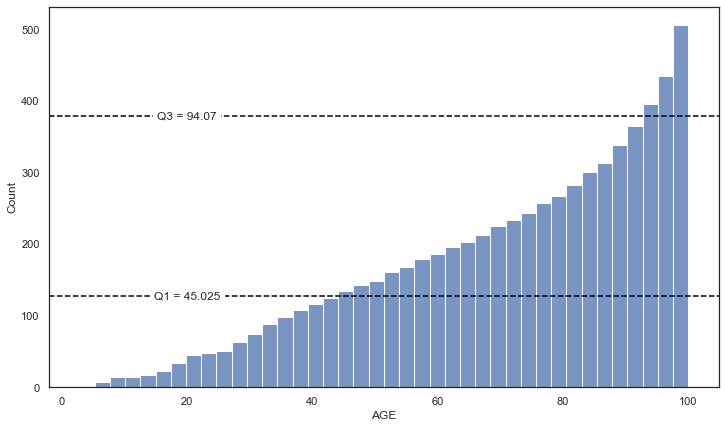

In [196]:
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(x='AGE',data=df,cumulative=True,bins=40)

q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)

count_q1 = df[df['AGE']<=q1]['AGE'].count()
count_q3 = df[df['AGE']<=q3]['AGE'].count()

ax = plt.gca()

ax.axhline(count_q1, c='black',linestyle='--')
plt.text(20,count_q1, 'Q1 = '+str(q1), fontsize=12, va='center', ha='center',backgroundcolor='w')

ax.axhline(count_q3, c='black',linestyle='--')
plt.text(20,count_q3, 'Q3 = '+str(round(q3,2)), fontsize=12, va='center', ha='center',backgroundcolor='w')

## add title !! ## 

plt.show()

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

From the correlation matrix we observed the two highest correlated pairs:
    <li><b><u>TAX and INDUS with a positive correlation:</u></b> This correlation argues that the more retial buisnesses per acers the higher the tax payment</li>
    <li><b><u>NOX and DIS with a negative correlation:</u></b> This correlation argues that as long as a preson lives further from the center the air pollution decreases </li>
    

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Answer: 

The number of parameters define the joint distribution is: $(n\times m\times k) -1 \rightarrow (n\times m\times 2) -1 $
<br>The last parameter can be calculated based on the second axiom of probability(P($\Omega$) = 1)

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Answer: 

The number of parameters define the joint distribution is: $(n-1) + (m-1) + (k-1) \rightarrow n + m -1  $

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Answer: 

The number of parameters define the joint distribution is: $k\times ((n-1) + (m-1)) -1\rightarrow 2\times ((n-1) + (m-1)) -1  $

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

#### 4.C
What percent of people earn more than 70,000 RCU?

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results